In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special

In [0]:
def dove_payoff(i,c,N):
    nd = i
    nh = N - nd
    R = 1
    if nh == 0 :
        return R/N
    else:
        return 0
        

In [0]:
def dove_payoff_T(i,cd,N,T):
    nd = i
    nh = N - nd
    if (nd/N) >= T :
        value = (R-nh*cd)/nd
        return value
    else:
        return 0
        

In [0]:
def hawk_payoff(i,c,N):
    nh = N - i
    R = 1
    if nh == 0 :
        return 0
    else:
        payoff = (R - ((nh - 1)*c))/nh
        return payoff

In [0]:
def hawk_payoff_T(i,ch,N,T):
    nd = i
    nh = N - nd
    if (nd/N) >= T:
        return 0
    else:
        value = (R-(nh-1)*ch)/nh
        return value

In [0]:
def fitness_hawk(x,c,N):
    f_h = 0
    #N = 5
    for i in range(N-1):
        val = scipy.special.binom(N - 1, i)
        f_h += val * (x**i)*((1-x)**(N-1-i))*hawk_payoff(i,c,N)
    return f_h

In [0]:
def fitness_hawk_T(x,ch,N,T):
    f_h = 0
    for i in range(N-1):
        val = scipy.special.binom(N - 1, i)
        f_h += val * (x**i)*((1-x)**(N-1-i))*hawk_payoff_T(i,ch,N,T)
    return f_h

In [0]:
def fitness_dove(x,c,N):
    f_d = 0
    #N = 5
    for i in range(N-1):
        val = scipy.special.binom(N - 1, i)
        f_d += val * (x**i)*((1-x)**(N-1-i))*dove_payoff(i+1,c,N)

    return f_d

In [0]:
def fitness_dove_T(x,cd,N,T):
    f_d = 0
    for i in range(N-1):
        val = scipy.special.binom(N - 1, i)
        f_d += val * (x**i)*((1-x)**(N-1-i))*dove_payoff_T(i+1,cd,N,T)
    return f_d

In [0]:
nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)
c_variant = np.linspace(0, 1, num=nb_points, dtype=np.float64)
strategy_j = 1 - strategy_i
R = 1
N = 5

count_2 = 0
c_values = [0.1,0.5,0.9]

x_dot_group = np.zeros((len(c_values),nb_points), dtype=float)
for c in c_values:
  count = 0
  x_dot = np.zeros((nb_points), dtype=float)
  for x in strategy_i:
      #x_dot[count] = x*(1-x)*(fitness_dove(x,c,N) - fitness_hawk(x,c,N))  **not working**
      x_dot[count] = (x/N) * ( (c*(x**N)) + (R*x**(N-1)) - N*c*x + N*c - R - c  )
      count+=1

  x_dot_group[count_2] = x_dot
  count_2 += 1

In [0]:
c = 0
#fig = plt.figure(figsize=(8,4))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for x_d in range(len(x_dot_group)):
  plt.plot(strategy_i,x_dot_group[x_d], label=r'$C_h$={}'.format(c_values[c]))
  c += 1

ax.spines['bottom'].set_position('zero')
plt.xlabel('Frequency of doves x' ) 
plt.ylabel('Gradient of selection ' + r'$\.x$')
#plt.title('Gradient of selection of an N= 5 sampled sized infinite population')
plt.legend()
plt.savefig('Gradient_selection_infinite.png')


In [0]:

vals = []
strategy_h = np.linspace(0, 1, num=100, dtype=np.float64)
Nvals = [5, 10, 20, 50, 100]
for nId in range(len(Nvals)):  
    N = Nvals[nId]
    print(N)
    vals.append([])
    for x in strategy_h:
        found_equi = False
        cost = 0.0
        while not found_equi:
            x_dot = (x/N) * ( (cost*(x**N)) + (R*x**(N-1)) - N*cost*x + N*cost - R - cost  )
            if x_dot >= 0 or math.isnan(x_dot) or cost > 2:
                vals[nId].append(cost)
                found_equi = True
            else:
                cost += 0.001
for nId in range(len(Nvals)):
    plt.plot(vals[nId], [z for z in range(0,100)], marker='o',label='N=' + str(Nvals[nId]))
#print(vals)
plt.xlim(0, 1)
plt.ylim(0, 99)
plt.legend()
plt.xlabel('cost for hawks fighting')
plt.ylabel('fraction of doves at equilibrium')
plt.title('Equilibria of the N-person Hawk-Dove Game in infinite populations')
plt.savefig('Equilibria_infinite.png')
plt.show()


Ch variant

In [1]:

vals = []
strategy_h = np.linspace(0, 1, num=101, dtype=np.float64)
#Nvals = [5, 10, 20, 50, 100]

#T = 0.4
R = 1
N = 5
cd_vals = [0.2,0.5,0.8]
T_values = [0.2,0.4,0.6,0.8]
for T in T_values:
  vals = []
  strategy_h = np.linspace(0, 1, num=101, dtype=np.float64)
  for cId in range(len(cd_vals)):  
      cd = cd_vals[cId]
      print(cd)
      vals.append([])
      for x in strategy_h:
          found_equi = False
          ch = 0.0
          x_dot = 0
          while not found_equi:
              x_dot = x*(1-x)*(fitness_dove_T(x,cd,N,T) - fitness_hawk_T(x,ch,N,T))
              #x_dot = (x/N) * ( (cost*(x**N)) + (R*x**(N-1)) - N*cost*x + N*cost - R - cost  )
              if x_dot >= 0 or math.isnan(x_dot) or ch > 2:
                  vals[cId].append(ch)
                  found_equi = True
              else:
                  ch += 0.001
  counter = 0
  for cId in range(len(cd_vals)):
      plt.plot(vals[cId], [z for z in range(101)]  ,marker='^',label='Cd=' + str(cd_vals[cId]))
      counter=counter+1
  plt.xlim(0, 1)
  plt.ylim(0, 110)
  plt.legend()
  plt.xlabel('cost for hawks fighting')
  plt.ylabel('fraction of doves at equilibrium')
  plt.title('T = {}'.format(T))

  plt.show()


NameError: ignored

Cd variant

0.2
0.5
0.8


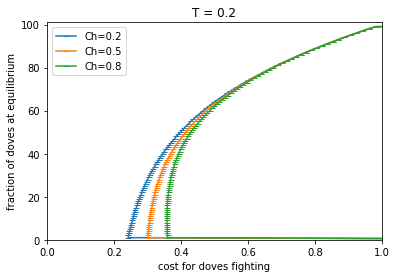

0.2
0.5
0.8


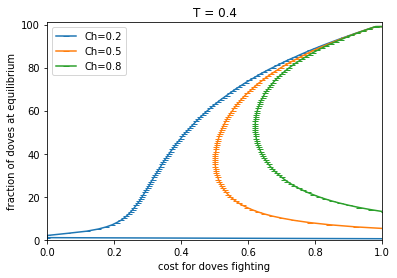

0.2
0.5
0.8


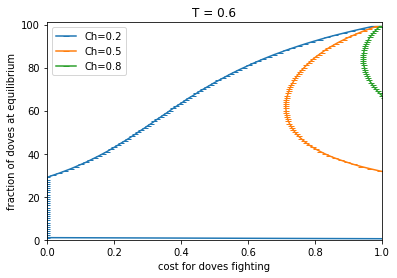

0.2
0.5
0.8


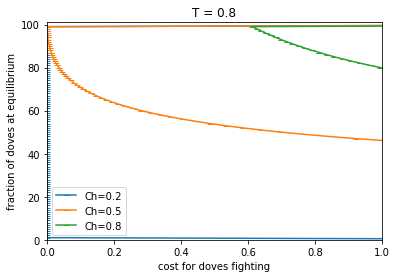

In [27]:
vals = []
strategy_h = np.linspace(0, 1, num=101, dtype=np.float64)
#Nvals = [5, 10, 20, 50, 100]
#T = 0.4
R = 1
N = 5
ch_vals = [0.2,0.5,0.8]
T_values = [0.2,0.4,0.6,0.8]
for T in T_values:
  vals = []
  strategy_h = np.linspace(0, 1, num=101, dtype=np.float64)
  for cId in range(len(ch_vals)):  
      ch = ch_vals[cId]
      print(ch)
      vals.append([])
      for x in strategy_h:
          found_equi = False
          cd = 0.0
          #x_dot = 0
          while not found_equi:
              x_dot = x*(1-x)*(fitness_dove_T(x,cd,N,T) - fitness_hawk_T(x,ch,N,T))
              #x_dot = (x/N) * ( (cost*(x**N)) + (R*x**(N-1)) - N*cost*x + N*cost - R - cost  )
              if x_dot < 0 or math.isnan(x_dot) or cd > 2:
                  vals[cId].append(cd)
                  found_equi = True
              else:
                  cd += 0.001
  for cId in range(len(ch_vals)):
      plt.plot(vals[cId], [z for z in range(101)], marker='_',label='Ch=' + str(ch_vals[cId]))
  plt.xlim(0,1)
  plt.ylim(0, 101)
  plt.legend()
  plt.xlabel('cost for doves fighting')
  plt.ylabel('fraction of doves at equilibrium')
  plt.title('T = {}'.format(T))
  plt.savefig('Equilibria_infinite_T_{}_dove_cost.png'.format(T))
  plt.show()